Aufgabe 1
==========

**Implementieren Sie den asymptotisch korrekten Fehlerschätzer (aus Folgerung 1.40) für die Simpsonregel. Implementieren Sie weiters die Richardson-Extrapolation der Simpsonregel und bestimmen
Sie die Ordnung dieses neuen Quadraturverfahrens aus einem Genauigkeits-Aufwandsdiagramm.
Verwenden Sie zum Test das Integral von Aufgabe (1) auf Blatt 2.**

Folgerung 1.40:

>(a) Fehlerschätzung für die Quadraturformel $ I_2 $:
>
>$$
>\int_{\alpha}^{\alpha + h} f(\xi) \, d\xi - I_2 = \frac{I_2 - I_1}{2^p - 1} + \mathcal{O}(h^{p+2})
>$$
>
>Es gilt für die Simpsonregel:
>
>$$
>I_1 = \frac{1}{6}(g(0) + 4g(\tfrac{1}{2}) + g(1))
>$$
>$$
>I_2 = \frac{1}{12}(g(0) + 4g(\tfrac{1}{4}) + 2g(\tfrac{1}{2}) + 4g(\tfrac{3}{4}) + g(1))
>$$
>
><!--Mit Ordnung \(p = 4\) gilt für die Asymptotische Fehlerschätzung:
>$$
>Fehler = \frac{I_2 - I_1}{2^p - 1} = \frac{I_2 - I_1}{15} = \frac{1}{180}(-g(0)+4g(\frac{1}{4})-6g(\frac{1}{2})+4g(\frac{3}{4})-g(1))
>$$ -->
>
>(b) Besserer Wert mittels Richardson Extrapolation:
>
>$$
>\int_{\alpha}^{\alpha + h} f(\xi) \, d\xi \approx \frac{2^p I_2 - I_1}{2^p - 1} =: I_3
>$$



Das Verfahren $ I_3 $ hat Ordnung $ p + 1 $ und heißt Richardson Extrapolation der Quadraturformel.


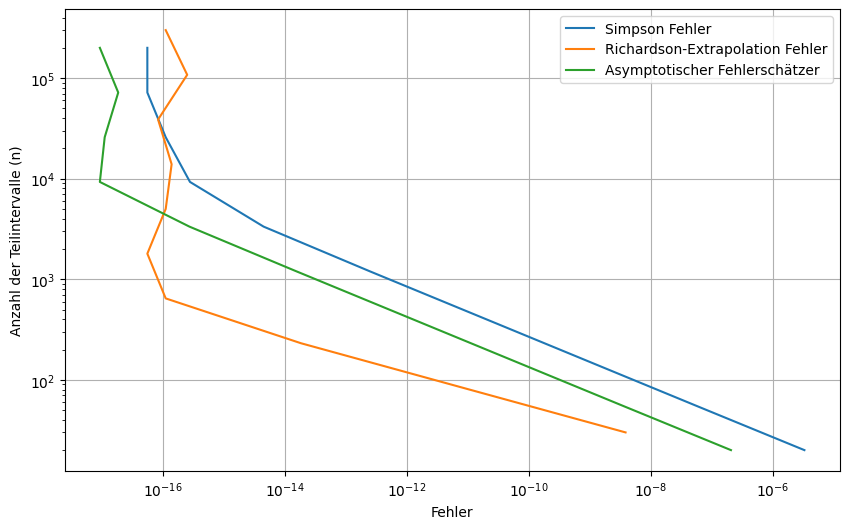

In [16]:
import matplotlib.pyplot as plt 
import numpy as np 

# Simpsonregel zur Berechnung des Integrals
def simpson(function, start, end, n):
    subint = n * 2  # n mal zwei, um zwei Subintervalle für die Simpsonregel zu erhalten
    h = (end - start) / subint
    x = np.linspace(start, end, subint + 1)
    fx = function(x)
    
    integral = fx[0] + fx[-1]
    integral += 4 * np.sum(fx[1:-1:2])  # Punkte an ungeraden Stellen
    integral += 2 * np.sum(fx[2:-2:2])  # Punkte an geraden Stellen
    
    return (h / 3) * integral

# Asymptotischer Fehlerschätzer
def asym_Fehler(fx, a, b, n, p=4):
    I_1 = simpson(fx, a, b, n)
    I_2 = simpson(fx, a, b, 2 * n)
    return abs(I_2 - I_1) / (2**p - 1)

# Richardson-Extrapolation für höhere Genauigkeit
def Richardson(fx, a, b, n, p=4):
    I_1 = simpson(fx, a, b, n)
    I_2 = simpson(fx, a, b, 2 * n)
    return (2**p * I_2 - I_1) / (2**p - 1)

# Funktion und exakter Integralwert
f = lambda x: np.cos(x) * np.exp(np.sin(x))
analytic_int = np.exp(np.sin(3)) - 1

# Verschiedene Werte für n in logarithmischem Bereich
n = np.logspace(1, 5, 10, dtype=int)

# Fehlerarrays vorbereiten
evals_simpson = np.empty(len(n))
evals_richard = np.empty(len(n))
err_simpson = np.empty(len(n))
err_richard = np.empty(len(n))
err_asym = np.empty(len(n))

# Fehlerberechnung und anzahl der Funktionsauswertungen für Simpson, Richardson und asymptotische Fehlerabschätzung
for i in range(len(n)):
    evals_simpson[i]   = 2*n[i]
    evals_richard[i]   = 3*n[i]
    err_simpson[i]  = abs(simpson(f, 0, 3, n[i]) - analytic_int)
    err_richard[i]  = abs(Richardson(f, 0, 3, n[i]) - analytic_int)
    err_asym[i]     = abs(asym_Fehler(f, 0, 3, n[i]))

# Plotten des Genauigkeits-Aufwandsdiagramms
plt.figure(figsize=(10, 6))
plt.loglog(err_simpson, evals_simpson, label='Simpson Fehler')
plt.loglog(err_richard, evals_richard, label='Richardson-Extrapolation Fehler')
plt.loglog(err_asym, evals_simpson, label='Asymptotischer Fehlerschätzer')
plt.xlabel("Fehler")
plt.ylabel("Anzahl der Teilintervalle (n)")
plt.legend()
plt.grid(True)
plt.show()



Aufgabe 2
=========

Result Trapezregel mit N = 100: 156.6674214151909
159
350


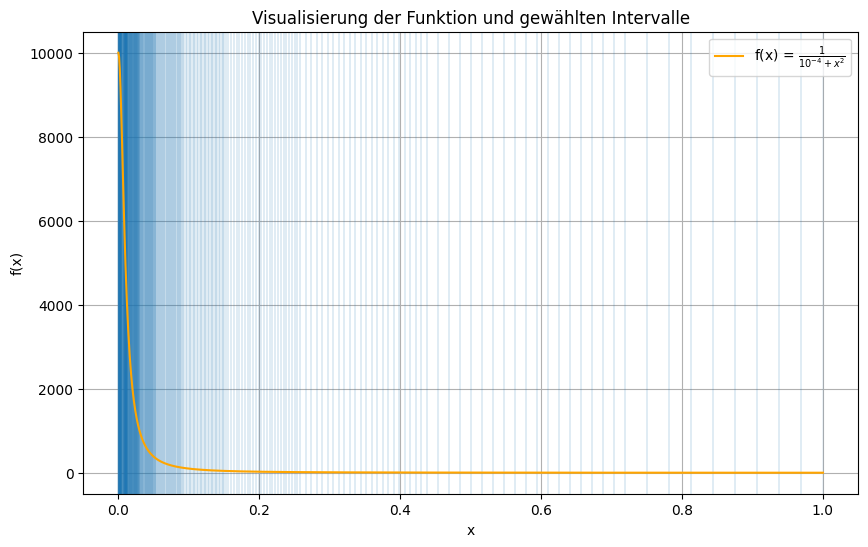

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definiere die Trapezregel
def trapez_rule(f, a, b, N):
    """
    Berechnet das Integral von f über das Intervall [a, b] mithilfe der Trapezregel mit N Teilintervallen.
    
    f: Funktion
    a: Untere Grenze
    b: Obere Grenze
    N: Anzahl der Teilintervalle
    """
    x_vals = np.linspace(a, b, N + 1)  # N+1 Punkte für N Intervalle
    h = (b - a) / N                     # Schrittgröße
    integral = 0.5 * (f(x_vals[0]) + f(x_vals[-1]))  # Start mit den Endpunkten

    # Berechne die Summe der Funktionswerte an den inneren Punkten
    integral += np.sum(f(x_vals[1:-1]))
    
    return h * integral

# Testfunktion für das Integral
def f(x):
    return 1 / (10**(-4) + x**2)

# Berechnung des Integrals
result = trapez_rule(f, 0, 1, 100)
print("Result Trapezregel mit N = 100:", result)

# Fehlerbewertung durch Einbettung
def err_einbettung(f, a, b, N):
    A1 = trapez_rule(f, a, b, N)
    A2 = trapez_rule(f, a, b, 2 * N)  # Berechne mit doppelt so vielen Intervallen
    return abs(A2 - A1)

# Intervallwahl-Algorithmus
def interval_auswahl(lower_bound, upper_bound, f, tol):
    # Speichere die Intervalle als Tupel in einer Liste
    intervals = [(lower_bound, upper_bound)]
    selection_result = []

    # Bearbeite die Intervalle
    while len(intervals) != 0:
        (a, b) = intervals.pop(0)  # Hole das erste Intervall

        # Berechne den Fehler mit der Einbettung
        if err_einbettung(f, a, b, 2) <= tol:
            selection_result.append((a, b))  # Wenn der Fehler innerhalb der Toleranz ist, speichere das Intervall
        else:
            # Teile das Intervall in zwei Hälften
            mid = (a + b) / 2
            intervals.extend([(a, mid), (mid, b)])  # Füge die beiden neuen Intervalle hinzu

    return selection_result

# Test der Intervallwahl
tolerance = 0.0001
print(len(interval_auswahl(0, 1, f, tolerance)))

tolerance = 0.00001
print(len(interval_auswahl(0, 1, f, tolerance)))

# Visualisierung der Funktion und der gewählten Intervalle
intervals_for_vis = interval_auswahl(0, 1, f, tolerance)
x_vals = np.linspace(0, 1, 1000)
y_vals = f(x_vals)

# Zeichnen der Intervalle
plt.figure(figsize=(10, 6))
for interval in intervals_for_vis:
    plt.axvline(x=interval[0],
                #color='blue',
                #linestyle='dashed',
                linewidth=0.1)
    plt.axvline(x=interval[1],
                #color='blue',
                #linestyle='dashed',
                linewidth=0.1)
plt.plot(x_vals, y_vals, color = 'orange', label= r"f(x) = $\frac{1}{10^{-4} + x^2}$")
plt.title("Visualisierung der Funktion und gewählten Intervalle")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

help(plt.plot)
